<a href="https://colab.research.google.com/github/BachokunIAR/health_sector/blob/main/covid19_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0117.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0101.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0108.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0110.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0119.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0115.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0116.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0105.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0106.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0121.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0111.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0103.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0120.jpeg
/kaggle/input/covid19-image-dataset/Co

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np


In [ ]:
# use keras get_file to download the auto MPG dataset
# source: https://archive.ics.uci.edu/ml/datasets/Auto+MPG
url = 'https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset/data'

import tensorflow as tf
tf.keras.utils.get_file('covid_data',url)

      0/Unknown 0s 0s/step

'/root/.keras/datasets/covid_data'

In [ ]:
# Setting up Hyperparameters for the data

IMAGE_SIZE = 256
BATCH_SIZE = 16
EPOCHS = 50 # This is the number of training iterations
CHANNELS = 3 # Height x weight x color


train_data_dir = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_data_dir = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_data_dir,
                                                             shuffle = True,
                                                             image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                              batch_size =BATCH_SIZE
                                                             )


test_data = tf.keras.preprocessing.image_dataset_from_directory(test_data_dir,
                                                             shuffle = True,
                                                             image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                              batch_size =BATCH_SIZE
                                                             )

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [ ]:
# What are the 3 classes of the data
class_names = train_data.class_names
class_names

['Covid', 'Normal', 'Viral Pneumonia']

In [ ]:
for image_batch, label_batch in train_data.take(1):
    print(image_batch[0].numpy())# matrix of first image

[[[4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]
  ...
  [4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]]

 [[4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]
  ...
  [4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]]

 [[4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]
  ...
  [4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]]

 ...

 [[4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]
  ...
  [4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]]

 [[4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]
  ...
  [4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]]

 [[4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]
  ...
  [4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]]]


In [ ]:
# checking for the shpe of the image
print(image_batch[0].shape)

(256, 256, 3)


# <font color = red>  Visualizing the data

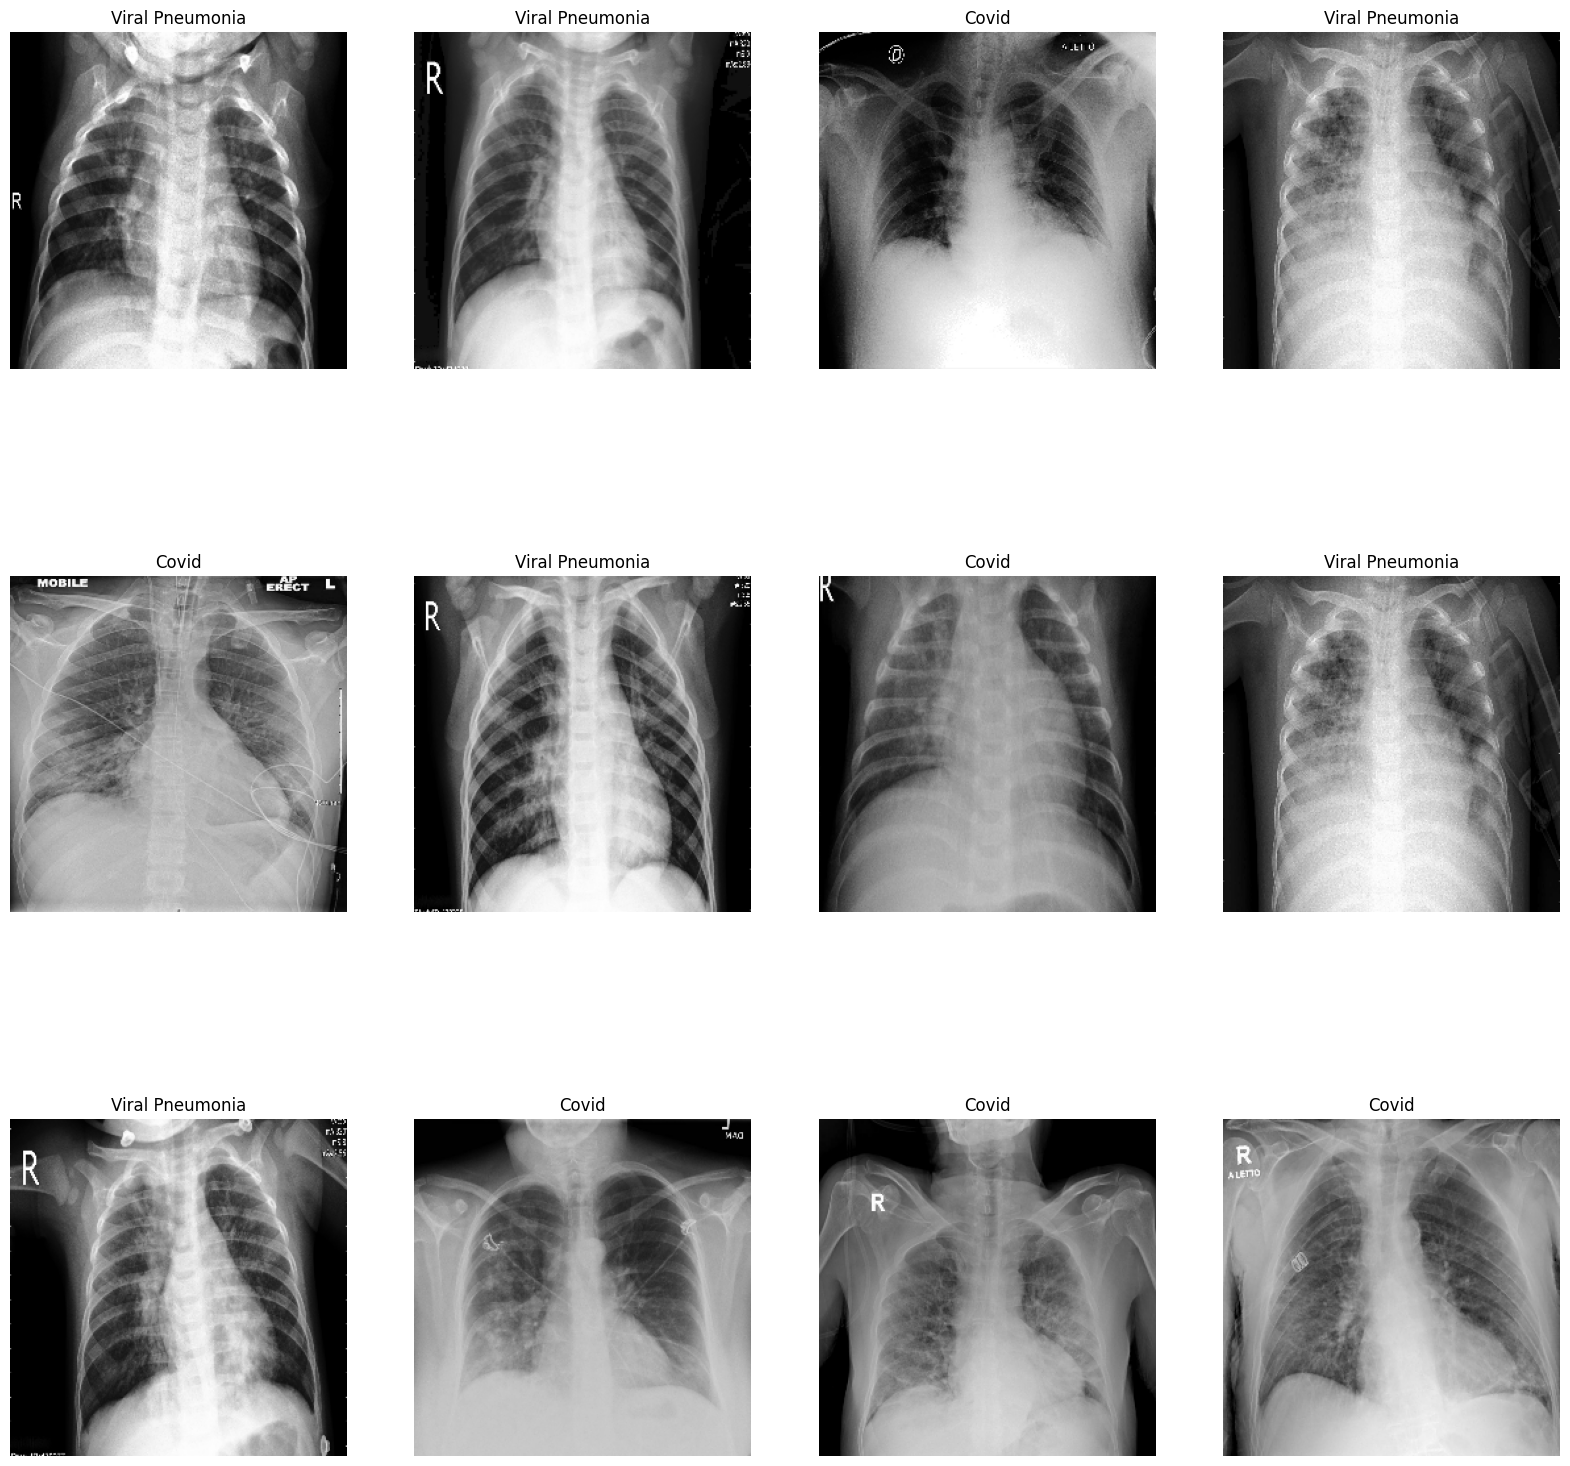

In [ ]:
 plt.figure(figsize=(20,20))
for image_batch, label_batch in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)

        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis(False)

In [ ]:
# This function will split the data into the requiered size
def get_data_splitting_tf(train_data,
                       train_split = 0.8,
                       val_split = 0.2,
                       test_split = test_data,
                       shuffle = True,
                       shuffle_size = 10000 # data will be shuffled and splitted
                       ):
    ds_size = len(train_data)
    if shuffle:
        train_data = train_data.shuffle(shuffle_size , seed = 42)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = train_data.take(train_size)
    val_ds = train_data.skip(train_size).take(val_size)

    test_ds = test_split


    return train_ds, test_ds, val_ds


In [ ]:
train_ds , test_ds, val_ds = get_data_splitting_tf(train_data)

In [ ]:


train_ds  = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds  = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
# Scaling the images
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
# generating more sqample by applying rotation, zoom etc.
#This is usually apply when the scientist does not have eneough data to train a model. about four to five more image can be geberated from on image which add to incre=ase the datasize
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# <font color =red> Building the Model

In [ ]:
input_shape  = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3 # This is the number of classes established above

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(16, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation = 'relu',),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])
model.build(input_shape = input_shape)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (16, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (16, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (16, 254, 254, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (16, 127, 127, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (16, 125, 125, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (16, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (16, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (16, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (16, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (16, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (16, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (16, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (16, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (16, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (16, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,227 (1.02 MB)

 Trainable params: 268,227 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
optimizer = 'Adam',
    #tf.keras.optimizers.Adam(learning_rate=1e-4),
    #tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(train_ds,
                   epochs = EPOCHS,
                   batch_size = BATCH_SIZE,
                   verbose  = True,
                   validation_data = val_ds
                   )

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.3781 - loss: 1.1015 - val_accuracy: 0.4792 - val_loss: 1.0783
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 859ms/step - accuracy: 0.4104 - loss: 1.0908 - val_accuracy: 0.4792 - val_loss: 1.0201
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 823ms/step - accuracy: 0.4723 - loss: 1.0256 - val_accuracy: 0.7917 - val_loss: 0.5788
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 821ms/step - accuracy: 0.6945 - loss: 0.7456 - val_accuracy: 0.6667 - val_loss: 0.7699
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 833ms/step - accuracy: 0.6231 - loss: 0.7918 - val_accuracy: 0.7708 - val_loss: 0.7358
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 807ms/step - accuracy: 0.7595 - loss: 0.6577 - val_accuracy: 0.6875 - val_loss: 0.7592
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 836ms/step - accuracy: 0.6997 - loss: 0.6462 - val_accuracy: 0.7917 - val_loss: 0.4801
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 812ms/step - accuracy: 0.7780 - loss: 0.5881 - val_accurac

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
history.params

{'verbose': True, 'epochs': 50, 'steps': 12}

In [ ]:
acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation accuracy')

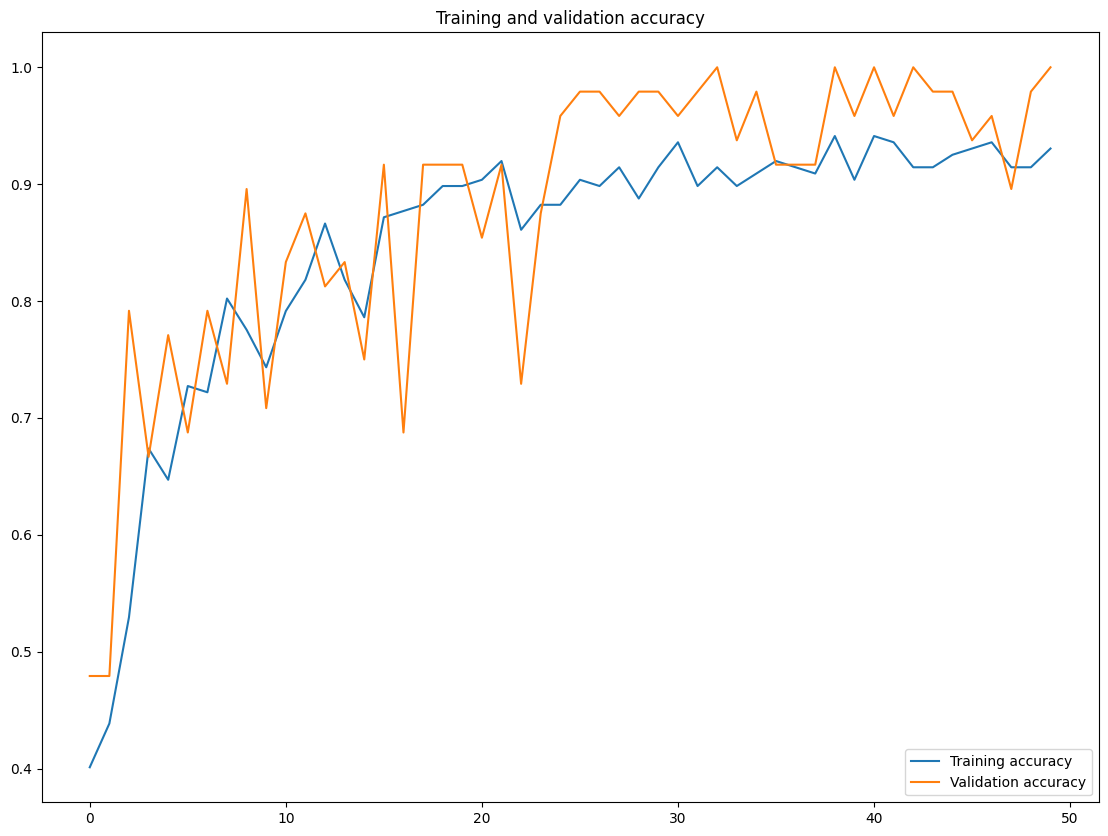

In [ ]:
plt.figure(figsize = (30, 10))
plt.subplot(1,2,1)

plt.plot(range(EPOCHS), acc, label = "Training accuracy")
plt.plot(range(EPOCHS), val_acc, label = 'Validation accuracy')

plt.legend(loc = 'lower right')

plt.title('Training and validation accuracy')


Text(0.5, 1.0, 'Training and validation loss')

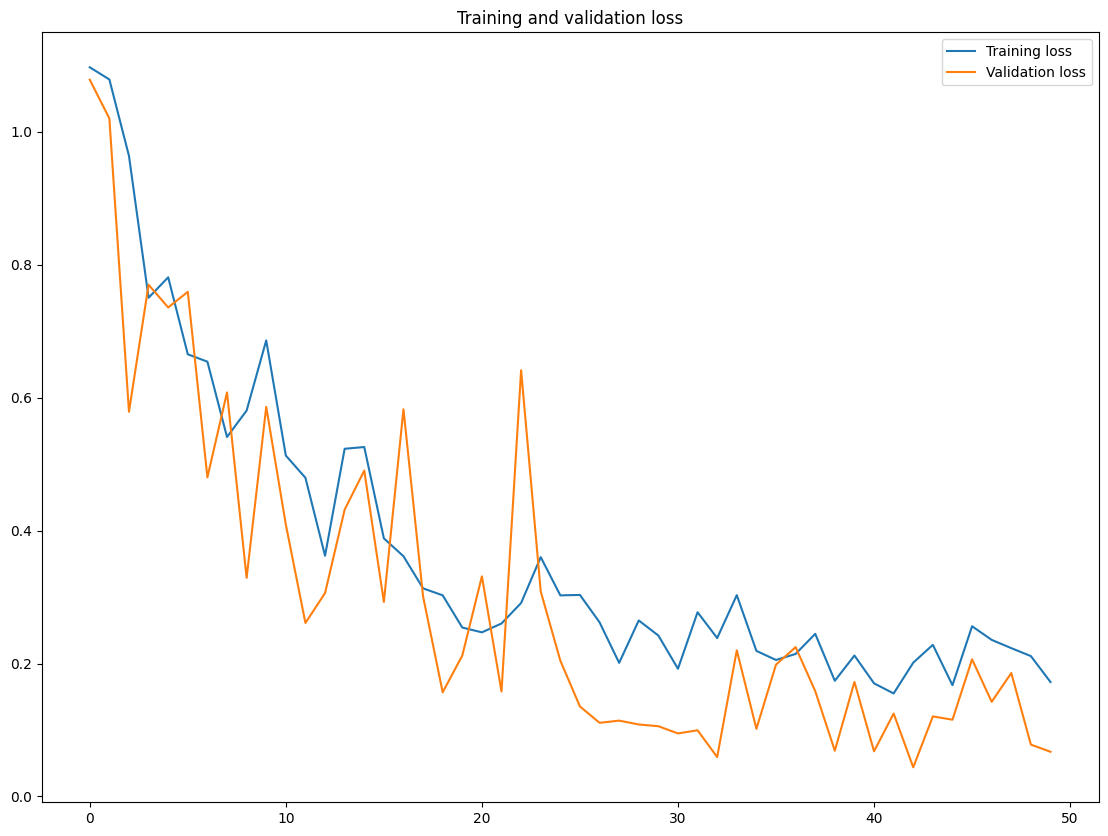

In [ ]:
plt.figure(figsize = (30, 10))
plt.subplot(1,2,1)

plt.plot(range(EPOCHS), loss, label = "Training loss")
plt.plot(range(EPOCHS), val_loss, label = 'Validation loss')

plt.legend(loc = 'upper right')

plt.title('Training and validation loss')

firt image to be predicted 
actual label :  Viral Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
predicted label Normal


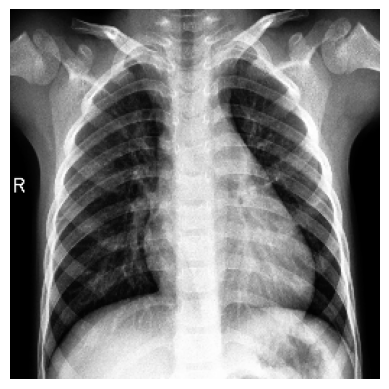

In [ ]:
for images_batch, labele_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))
    plt.axis(False)
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    print("firt image to be predicted ")
    plt.imshow(first_image)
    print("actual label : ", class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label",class_names[np.argmax(batch_prediction[0])])

# <font color = red> Creating a function to do the predictions

In [ ]:
def predict(model, img):

    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())

    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]

    confidence_Level = round(100*(np.max(predictions[0])),2)

    return predicted_class, confidence_Level

# <font color =red> Plotting some predicted images vrs. Actual/ true images using the test data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


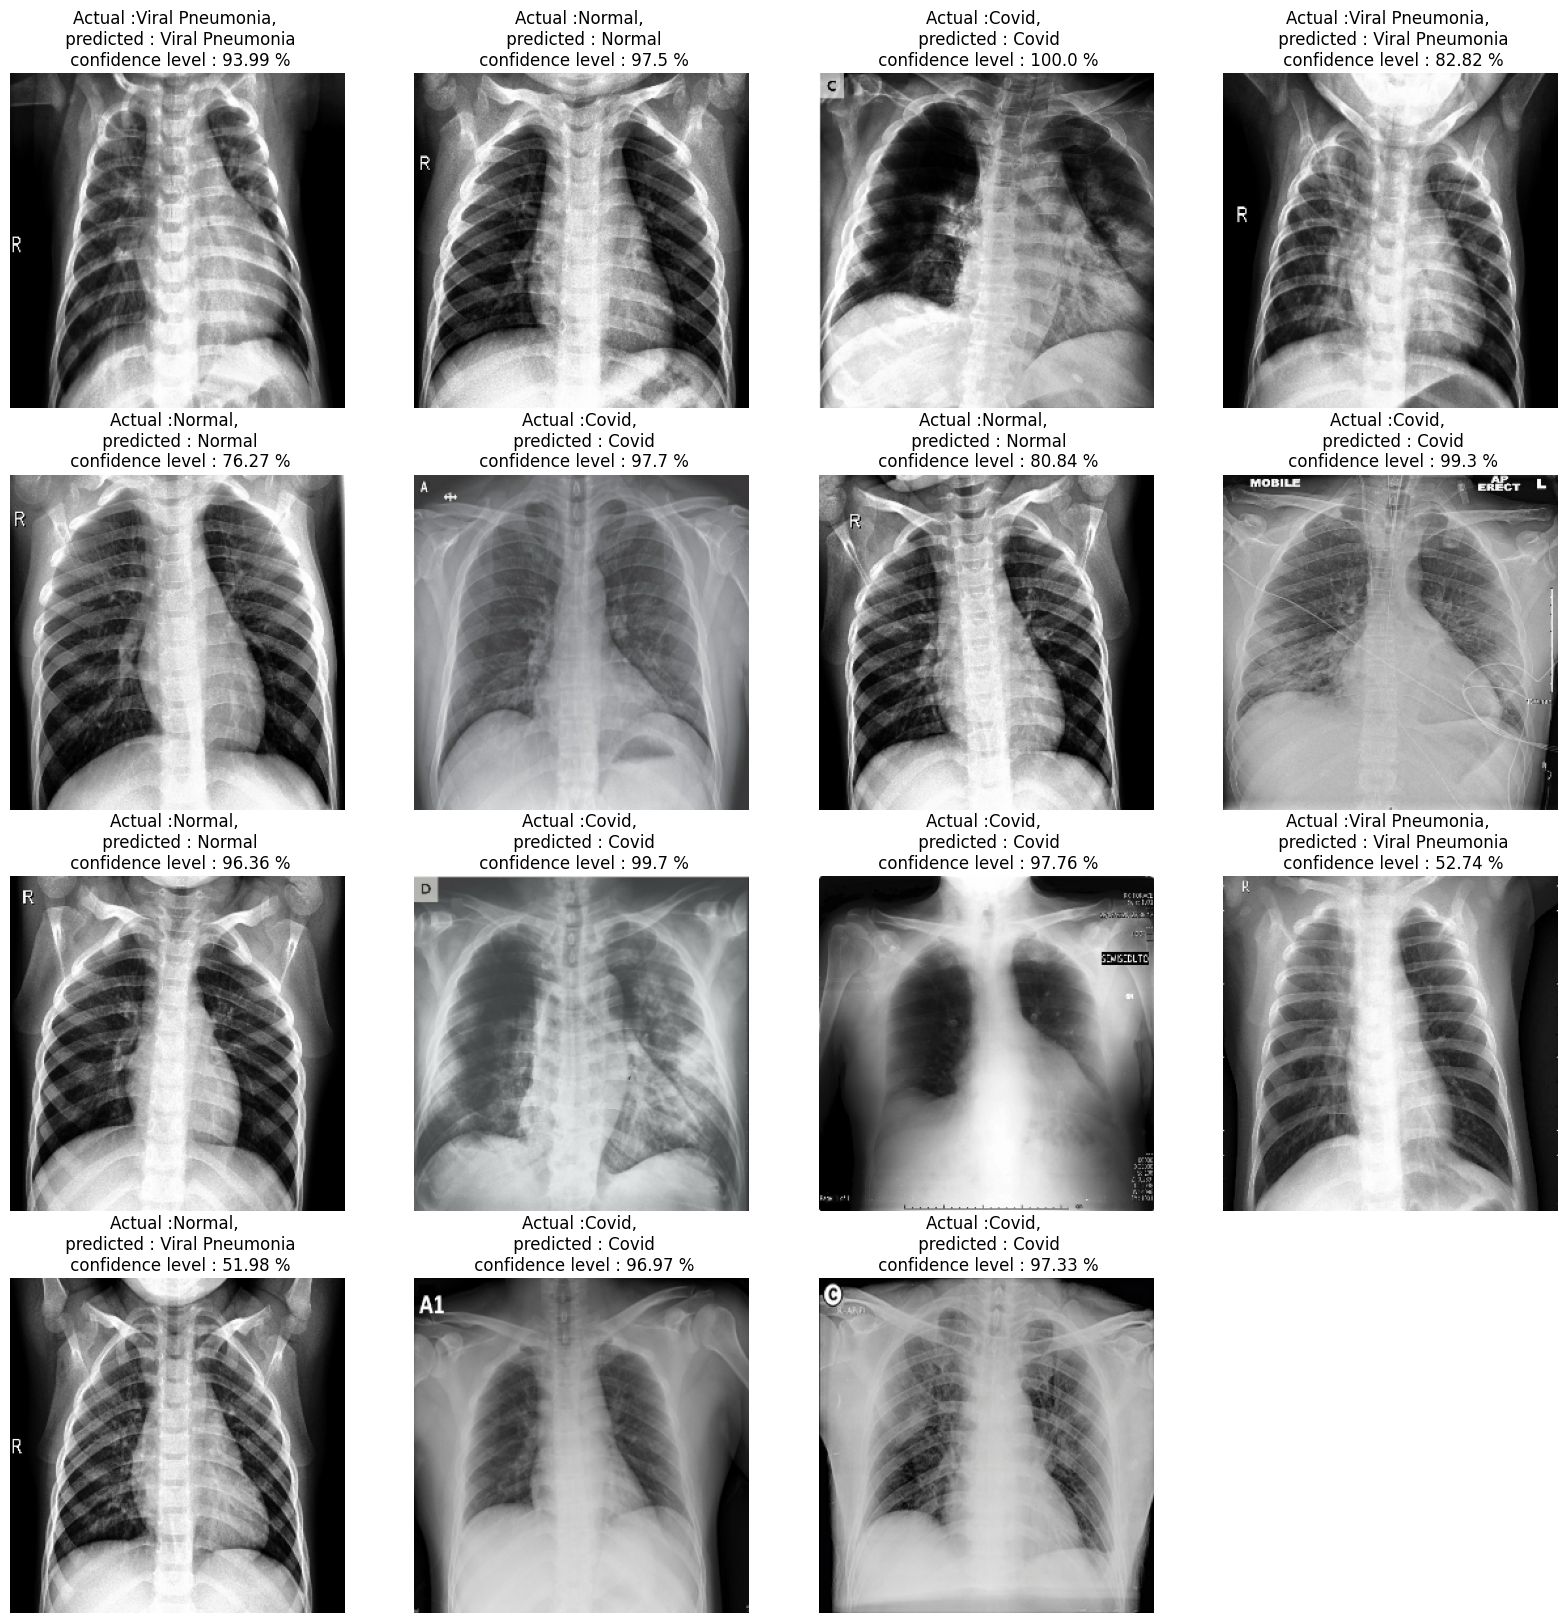

In [ ]:
plt.figure(figsize = (20,20))

for images, labels in test_ds.take(1):

    for i in range(15):

        ax = plt.subplot(4,4, i+1)

        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence_Level = predict(model, images[i].numpy())

        actual_class = class_names[labels[i]]

        plt.title(f"Actual :{actual_class}, \n predicted : {predicted_class}\n confidence level : {confidence_Level} %")

        plt.axis(False);
